In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

sns.set()

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [2]:
df = pd.read_csv('df.csv')

In [3]:
features = df.loc[:, 'budget':'Western']
target = df.loc[:,'proportion']

### Normal Linear Regression

In [4]:
X_train1, X_test1, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

X_train1, X_val1, y_train, y_val = train_test_split(X_train1, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train1)
X_val = scaler.fit_transform(X_val1)
X_test = scaler.transform(X_test1)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.46549064083588315

In [5]:
m.score(X_val,y_val)

-5.821347487826527e+23

In [6]:
m.score(X_test,y_test)

-1.8239384144124207e+24

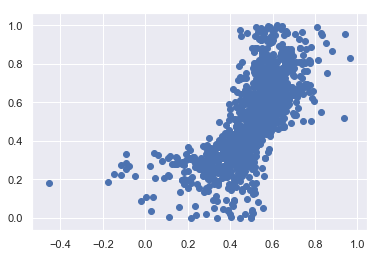

In [9]:
plt.scatter(m.predict(X_train),y_train)

(array([  2.,  10.,  49.,  99., 240., 483., 472.,  69.,  23.,  11.]),
 array([-0.63454335, -0.52037712, -0.40621088, -0.29204464, -0.17787841,
        -0.06371217,  0.05045406,  0.1646203 ,  0.27878654,  0.39295277,
         0.50711901]),
 <a list of 10 Patch objects>)

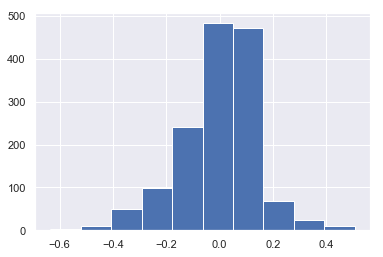

In [10]:
plt.hist(m.predict(X_train)-y_train)

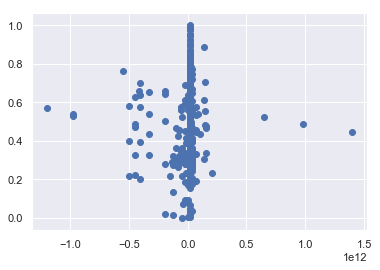

In [8]:
plt.scatter(m.predict(X_val),y_val)

(array([  3.,   0.,   9.,  15., 446.,  11.,   0.,   1.,   1.,   1.]),
 array([-1.19355347e+12, -9.34570883e+11, -6.75588293e+11, -4.16605703e+11,
        -1.57623113e+11,  1.01359477e+11,  3.60342067e+11,  6.19324657e+11,
         8.78307247e+11,  1.13728984e+12,  1.39627243e+12]),
 <a list of 10 Patch objects>)

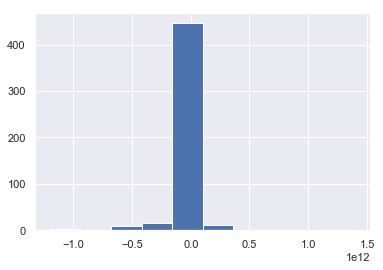

In [11]:
plt.hist(m.predict(X_val)-y_val)

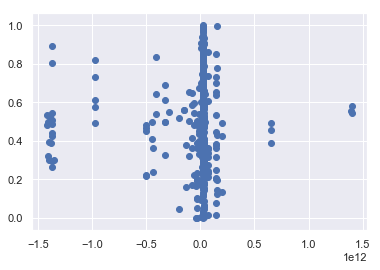

In [7]:
plt.scatter(m.predict(X_test),y_test)

(array([ 18.,   5.,   0.,  18.,  37., 565.,   0.,   3.,   0.,   3.]),
 array([-1.41189730e+12, -1.13081994e+12, -8.49742591e+11, -5.68665237e+11,
        -2.87587883e+11, -6.51052930e+09,  2.74566825e+11,  5.55644178e+11,
         8.36721532e+11,  1.11779889e+12,  1.39887624e+12]),
 <a list of 10 Patch objects>)

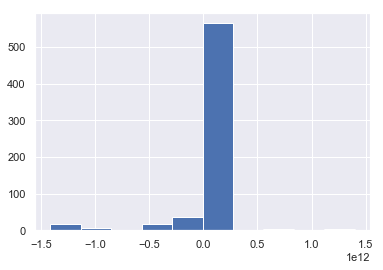

In [12]:
plt.hist(m.predict(X_test)-y_test)

In [13]:
c = list(zip(features.columns,m.coef_))
c = sorted(c, key=lambda x: x[1])
c

[('PG-13', -41602241237.57015),
 ('R', -41010962928.90616),
 ('PG', -32594951373.316086),
 ('G', -15322743977.773155),
 ('Not Rated', -12070013050.844006),
 ('NC-17', -3146869215.497823),
 ('cum_ww_gross', -0.28071719149655244),
 ('ratings_count', -0.01994091452875165),
 ('Animation', -0.017464637756347656),
 ('year', -0.014774631094219365),
 ('Action', -0.012576103210449219),
 ('Romance', -0.01067352294921875),
 ('budget', -0.009678856979337548),
 ('Drama', -0.009281158447265625),
 ('Fantasy', -0.005947113037109375),
 ('Music', -0.0040283203125),
 ('Biography', -0.0023365020751953125),
 ('Thriller', -0.0022974014282226562),
 ('History', -0.0019435882568359375),
 ('Mystery', -0.0014257431030273438),
 ('Horror', -0.001178741455078125),
 ('Family', -0.000865936279296875),
 ('Sci-Fi', -8.654594421386719e-05),
 ('Musical', 0.00017070770263671875),
 ('Crime', 0.0005397796630859375),
 ('Adventure', 0.0014300346374511719),
 ('War', 0.0015773773193359375),
 ('runtime', 0.0016039358874891246),


In [15]:
RMSE(m.predict(X_train),y_train)

0.14459267898163325

In [16]:
RMSE(m.predict(X_val),y_val)

150705601355.54196

In [17]:
RMSE(m.predict(X_test),y_test)

279198035338.17456

### Polynomial (2nd-degree), unregularized

In [23]:
poly2 = PolynomialFeatures(2)

lm_poly2 = LinearRegression()
lm_poly2.fit(poly2.fit_transform(X_train), y_train)
lm_poly2.score(poly2.fit_transform(X_train), y_train)

0.8357751175801582

In [24]:
lm_poly2.score(poly2.fit_transform(X_val), y_val)

-1.415932416508697e+24

In [25]:
lm_poly2.score(poly2.fit_transform(X_test), y_test)

-1.5969389146942377e+24

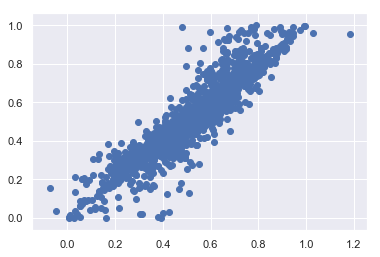

In [30]:
plt.scatter(lm_poly2.predict(poly2.transform(X_train)), y_train)

(array([  1.,   2.,  12.,  46., 173., 832., 326.,  49.,  11.,   6.]),
 array([-0.50944198, -0.41891098, -0.32837998, -0.23784899, -0.14731799,
        -0.056787  ,  0.033744  ,  0.12427499,  0.21480599,  0.30533698,
         0.39586798]),
 <a list of 10 Patch objects>)

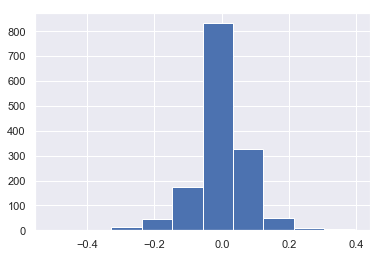

In [33]:
plt.hist(lm_poly2.predict(poly2.transform(X_train))- y_train)

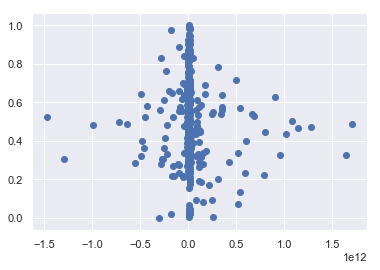

In [29]:
plt.scatter(lm_poly2.predict(poly2.transform(X_val)), y_val)

(array([  2.,   1.,   3.,  19., 422.,  21.,   9.,   5.,   3.,   2.]),
 array([-1.46575914e+12, -1.14872177e+12, -8.31684394e+11, -5.14647023e+11,
        -1.97609651e+11,  1.19427721e+11,  4.36465093e+11,  7.53502465e+11,
         1.07053984e+12,  1.38757721e+12,  1.70461458e+12]),
 <a list of 10 Patch objects>)

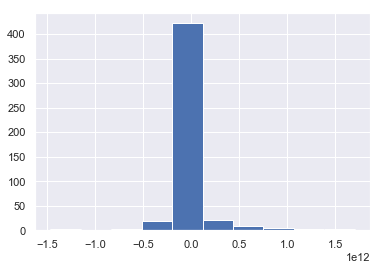

In [34]:
plt.hist(lm_poly2.predict(poly2.transform(X_val))- y_val)

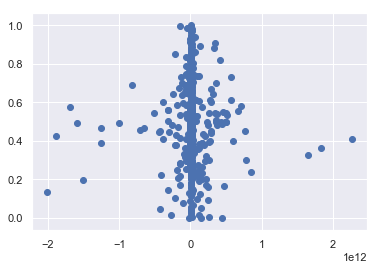

In [28]:
plt.scatter(lm_poly2.predict(poly2.transform(X_test)), y_test)

(array([  4.,   3.,   2.,  13., 564.,  52.,   8.,   0.,   2.,   1.]),
 array([-2.00890257e+12, -1.58147820e+12, -1.15405383e+12, -7.26629461e+11,
        -2.99205090e+11,  1.28219280e+11,  5.55643650e+11,  9.83068021e+11,
         1.41049239e+12,  1.83791676e+12,  2.26534113e+12]),
 <a list of 10 Patch objects>)

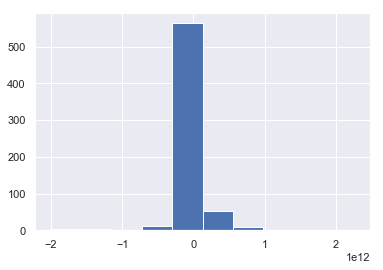

In [35]:
plt.hist(lm_poly2.predict(poly2.transform(X_test))- y_test)

In [48]:
RMSE(lm_poly2.predict(poly2.transform(X_train)), y_train)

0.0801471580212939

In [49]:
RMSE(lm_poly2.predict(poly2.transform(X_val)), y_val)

235038439277.54764

In [50]:
RMSE(lm_poly2.predict(poly2.transform(X_test)), y_test)

261247067886.5708

In [54]:
c = list(zip(features.columns,lm_poly2.coef_))
c = sorted(c, key=lambda x: x[1])
c

[('PG', -228805821209.09952),
 ('Germany', -225956114912.97137),
 ('France', -113059007404.42923),
 ('NC-17', -110936744373.4541),
 ('Not Rated', -76481030869.13162),
 ('Antoine Fuqua', -62188268820.59632),
 ('PG-13', -61632014195.146706),
 ('Japan', -54884029755.92263),
 ('Joel Schumacher', -50718612814.686325),
 ('Ivan Reitman', -49217985542.781044),
 ('other_country', -43749750835.14256),
 ('Canada', -27472018493.831066),
 ('R', -25034110278.16739),
 ('Paul W.S. Anderson', -24509601482.494366),
 ('M. Night Shyamalan', -22430646941.54867),
 ('China', -20795311574.319477),
 ('History', -18719199429.441322),
 ('budget', -14965613886.112907),
 ('Action', -12754640823.813982),
 ('year', -12244260518.01483),
 ('UK', -8527497889.693677),
 ('Music', -7889242793.759003),
 ('Fantasy', -7796432030.625403),
 ('Documentary', -7481154752.873422),
 ('Gore Verbinski', -6498282927.150258),
 ('Adventure', -6289863195.247646),
 ('Ridley Scott', -3062260746.861378),
 ('Mystery', -2883416772.9752417),
 

### Polynomial (3rd-degree), unregularized

In [38]:
poly3 = PolynomialFeatures(3)

lm_poly3 = LinearRegression()
lm_poly3.fit(poly3.fit_transform(X_train), y_train)
lm_poly3.score(poly3.fit_transform(X_train), y_train)

1.0

In [39]:
lm_poly3.score(poly3.fit_transform(X_val), y_val)

-139.7820508779392

In [40]:
lm_poly3.score(poly3.fit_transform(X_test), y_test)

-55.59039350136961

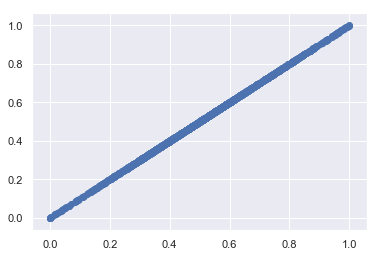

In [41]:
plt.scatter(lm_poly3.predict(poly3.transform(X_train)), y_train)

(array([  1.,   0.,   2.,   4.,  26., 508.,  87.,  15.,   2.,   4.]),
 array([-13.05920184, -10.73313759,  -8.40707335,  -6.0810091 ,
         -3.75494485,  -1.4288806 ,   0.89718365,   3.2232479 ,
          5.54931214,   7.87537639,  10.20144064]),
 <a list of 10 Patch objects>)

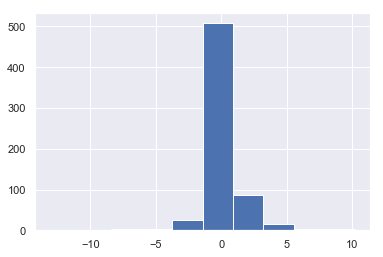

In [44]:
plt.hist(lm_poly3.predict(poly3.transform(X_test))- y_test)

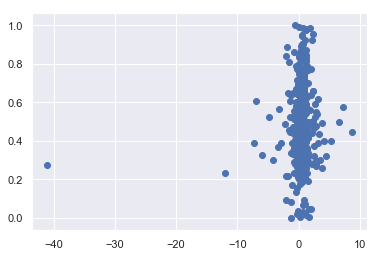

In [42]:
plt.scatter(lm_poly3.predict(poly3.transform(X_val)), y_val)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   2.,  20., 456.,   7.]),
 array([-41.26949334, -36.31993513, -31.37037692, -26.42081871,
        -21.4712605 , -16.52170229, -11.57214407,  -6.62258586,
         -1.67302765,   3.27653056,   8.22608877]),
 <a list of 10 Patch objects>)

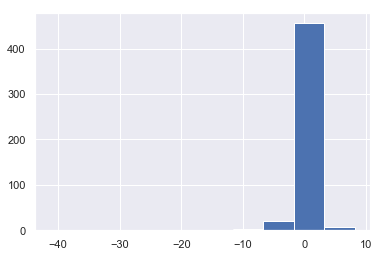

In [45]:
plt.hist(lm_poly3.predict(poly3.transform(X_val))- y_val)

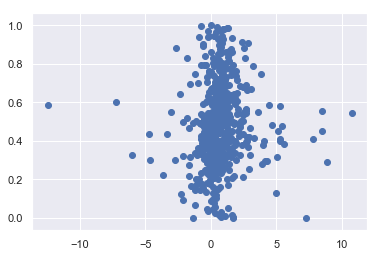

In [43]:
plt.scatter(lm_poly3.predict(poly3.transform(X_test)), y_test)

(array([  1.,   0.,   2.,   4.,  26., 508.,  87.,  15.,   2.,   4.]),
 array([-13.05920184, -10.73313759,  -8.40707335,  -6.0810091 ,
         -3.75494485,  -1.4288806 ,   0.89718365,   3.2232479 ,
          5.54931214,   7.87537639,  10.20144064]),
 <a list of 10 Patch objects>)

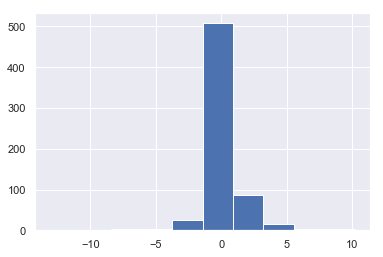

In [47]:
plt.hist(lm_poly3.predict(poly3.transform(X_test))- y_test)

In [51]:
RMSE(lm_poly3.predict(poly3.transform(X_train)), y_train)

1.1803441954177384e-13

In [52]:
RMSE(lm_poly3.predict(poly3.transform(X_val)), y_val)

2.343642020353038

In [53]:
RMSE(lm_poly3.predict(poly3.transform(X_test)), y_test)

1.5551727208117898

In [55]:
c = list(zip(features.columns,lm_poly3.coef_))
c = sorted(c, key=lambda x: x[1])
c

[('ratings_count', -0.048946234251681806),
 ('runtime', -0.008645341460520007),
 ('usa_gross', -0.006650749236722358),
 ('Antoine Fuqua', -0.005735643838200384),
 ('Adventure', -0.0025168594067437712),
 ('Sport', -0.0011654263569042171),
 ('USA', -0.0005351083689220052),
 ('Biography', -0.00014513016981175725),
 ('NC-17', -0.00010345382506786514),
 ('PG', -9.417686102511174e-05),
 ('China', -5.335310922626867e-05),
 ('Action', -3.601354064443178e-05),
 ('budget', -2.0967285307619968e-05),
 ('Clint Eastwood', -1.3075468060113999e-05),
 ('David Fincher', -8.735489164751996e-06),
 ('Germany', -7.402897721889113e-06),
 ('Gore Verbinski', -6.0219023702025084e-06),
 ('M. Night Shyamalan', -4.9739118569101265e-06),
 ('Japan', -4.35561168269549e-06),
 ('other_director', -4.173974797240371e-06),
 ('Mystery', -3.7508606395743417e-06),
 ('Steven Soderbergh', -2.4270491528641703e-06),
 ('Chris Columbus', -2.295328655656983e-06),
 ('UK', -1.6431679165156566e-06),
 ('Spain', -1.4513509135046202e-06)

### Polynomial (3rd-degree), regularized with Ridge

In [56]:
need to run regressions, plots, coefficients

SyntaxError: invalid syntax (<ipython-input-56-d02126c457e1>, line 1)

### Polynomial (3rd-degree), regularized with Lasso

In [57]:
need to run regressions, plots, coefficients

SyntaxError: invalid syntax (<ipython-input-57-d02126c457e1>, line 1)

### Random Forests

In [58]:
need to run regressions, plots, feature importance

SyntaxError: invalid syntax (<ipython-input-58-51f68f492fa5>, line 1)

### Gradient-Boosted

In [59]:
need to run regressions, plots, feature importance

SyntaxError: invalid syntax (<ipython-input-59-51f68f492fa5>, line 1)